<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing the dataset
dataset=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
pd.options.display.max_columns = None
dataset.head(4)

C:\python\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

In [5]:
dataset.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
dataset['Created Date']=pd.to_datetime(dataset['Created Date'])
dataset['Closed Date']=pd.to_datetime(dataset['Closed Date'])

In [7]:
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [8]:
dataset['Request_Closing_Time'] = dataset['Closed Date']-dataset['Created Date']

In [9]:
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [10]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [11]:
dataset.drop(['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2','Resolution Description', 
     'Resolution Action Updated Date','Community Board','X Coordinate (State Plane)','School or Citywide Complaint',
    'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name','School Name', 'School Number', 
              'School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found','Ferry Direction', 'Ferry Terminal Name','Unique Key','Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment'],axis=1,inplace=True)

In [12]:
dataset.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Landmark,Facility Type,Status,Due Date,Borough,Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 22 columns):
Created Date                  364558 non-null datetime64[ns]
Closed Date                   362177 non-null datetime64[ns]
Agency                        364558 non-null object
Agency Name                   364558 non-null object
Complaint Type                364558 non-null object
Descriptor                    358057 non-null object
Location Type                 364425 non-null object
Incident Zip                  361560 non-null float64
Address Type                  361306 non-null object
City                          361561 non-null object
Landmark                      375 non-null object
Facility Type                 362169 non-null object
Status                        364558 non-null object
Due Date                      364555 non-null object
Borough                       364558 non-null object
Y Coordinate (State Plane)    360528 non-null float64
Park Facility Name        

In [14]:
dataset.isna().sum()

Created Date                       0
Closed Date                     2381
Agency                             0
Agency Name                        0
Complaint Type                     0
Descriptor                      6501
Location Type                    133
Incident Zip                    2998
Address Type                    3252
City                            2997
Landmark                      364183
Facility Type                   2389
Status                             0
Due Date                           3
Borough                            0
Y Coordinate (State Plane)      4030
Park Facility Name                 0
Park Borough                       0
Latitude                        4030
Longitude                       4030
Location                        4030
Request_Closing_Time            2381
dtype: int64

In [15]:
#dropping created and closed date
dataset.drop(['Closed Date','Created Date'],axis=1,inplace=True)


In [16]:
dataset.head(5)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Landmark,Facility Type,Status,Due Date,Borough,Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:30
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:13
2,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:34
3,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:27
4,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,NaN,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:44


In [17]:
#dealing with missing values
dataset.isna().sum()

Agency                             0
Agency Name                        0
Complaint Type                     0
Descriptor                      6501
Location Type                    133
Incident Zip                    2998
Address Type                    3252
City                            2997
Landmark                      364183
Facility Type                   2389
Status                             0
Due Date                           3
Borough                            0
Y Coordinate (State Plane)      4030
Park Facility Name                 0
Park Borough                       0
Latitude                        4030
Longitude                       4030
Location                        4030
Request_Closing_Time            2381
dtype: int64

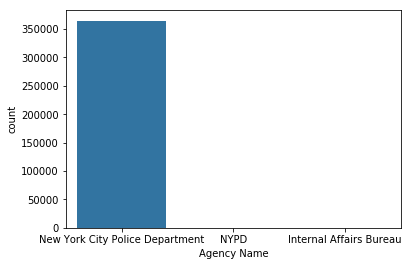

In [18]:
dataset['Agency'].value_counts()
dataset['Agency Name'].value_counts()
sns.countplot(dataset['Agency Name'])

[Text(0,0,'Noise - Street/Sidewalk'),
 Text(0,0,'Blocked Driveway'),
 Text(0,0,'Illegal Parking'),
 Text(0,0,'Derelict Vehicle'),
 Text(0,0,'Noise - Commercial'),
 Text(0,0,'Noise - House of Worship'),
 Text(0,0,'Posting Advertisement'),
 Text(0,0,'Noise - Vehicle'),
 Text(0,0,'Animal Abuse'),
 Text(0,0,'Vending'),
 Text(0,0,'Traffic'),
 Text(0,0,'Drinking'),
 Text(0,0,'Bike/Roller/Skate Chronic'),
 Text(0,0,'Panhandling'),
 Text(0,0,'Noise - Park'),
 Text(0,0,'Homeless Encampment'),
 Text(0,0,'Urinating in Public'),
 Text(0,0,'Graffiti'),
 Text(0,0,'Disorderly Youth'),
 Text(0,0,'Illegal Fireworks'),
 Text(0,0,'Ferry Complaint'),
 Text(0,0,'Agency Issues'),
 Text(0,0,'Squeegee'),
 Text(0,0,'Animal in a Park')]

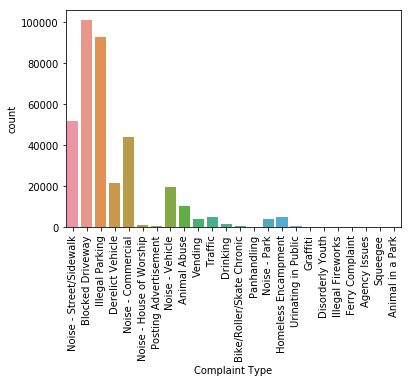

In [19]:
dataset['Complaint Type'].value_counts().head()
plot=sns.countplot(dataset['Complaint Type'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

In [20]:
dataset['Descriptor'].isna().sum()

6501

In [21]:
dataset['Descriptor'].describe()

count        358057
unique           45
top       No Access
freq          75888
Name: Descriptor, dtype: object

In [22]:
dataset['Descriptor'].value_counts().head(5)

No Access                        75888
Loud Music/Party                 69708
Posted Parking Sign Violation    27200
Partial Access                   24993
Loud Talking                     23810
Name: Descriptor, dtype: int64

[Text(0,0,'Noise - Street/Sidewalk'),
 Text(0,0,'Blocked Driveway'),
 Text(0,0,'Illegal Parking'),
 Text(0,0,'Derelict Vehicle'),
 Text(0,0,'Noise - Commercial'),
 Text(0,0,'Noise - House of Worship'),
 Text(0,0,'Posting Advertisement'),
 Text(0,0,'Noise - Vehicle'),
 Text(0,0,'Animal Abuse'),
 Text(0,0,'Vending'),
 Text(0,0,'Traffic'),
 Text(0,0,'Drinking'),
 Text(0,0,'Bike/Roller/Skate Chronic'),
 Text(0,0,'Panhandling'),
 Text(0,0,'Noise - Park'),
 Text(0,0,'Homeless Encampment'),
 Text(0,0,'Urinating in Public'),
 Text(0,0,'Graffiti'),
 Text(0,0,'Disorderly Youth'),
 Text(0,0,'Illegal Fireworks'),
 Text(0,0,'Ferry Complaint'),
 Text(0,0,'Agency Issues'),
 Text(0,0,'Squeegee'),
 Text(0,0,'Animal in a Park')]

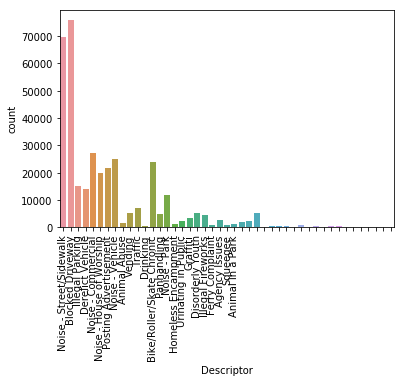

In [23]:
plot2=sns.countplot(dataset['Descriptor'])
plot2.set_xticklabels(plot.get_xticklabels(),rotation=90)

In [24]:
dataset['Location Type'].isna().sum()

133

In [25]:
dataset['Location Type'].value_counts().head()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
Name: Location Type, dtype: int64

[Text(0,0,'Street/Sidewalk'),
 Text(0,0,'Club/Bar/Restaurant'),
 Text(0,0,'Store/Commercial'),
 Text(0,0,'House of Worship'),
 Text(0,0,'Residential Building/House'),
 Text(0,0,'Residential Building'),
 Text(0,0,'Park/Playground'),
 Text(0,0,'Vacant Lot'),
 Text(0,0,'House and Store'),
 Text(0,0,'Highway'),
 Text(0,0,'Commercial'),
 Text(0,0,'Roadway Tunnel'),
 Text(0,0,'Subway Station'),
 Text(0,0,'Parking Lot'),
 Text(0,0,'Bridge'),
 Text(0,0,'Terminal'),
 Text(0,0,'Ferry'),
 Text(0,0,'Park')]

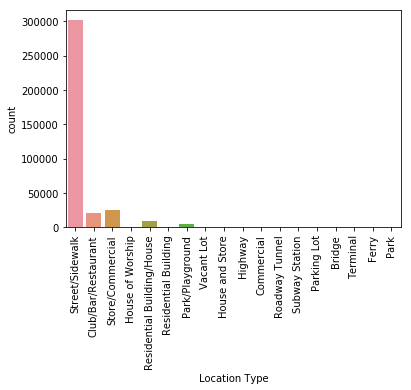

In [23]:
dataset['Location Type'].fillna(value='Street/Sidewalk',inplace =True)
plot3=sns.countplot(dataset['Location Type'])
plot3.set_xticklabels(plot3.get_xticklabels(),rotation=90)

In [27]:
dataset['Incident Zip'].value_counts().head()
dataset['Incident Zip'].isna().sum()
dataset['Incident Zip'].fillna(value=11385,inplace=True)

11385.0    6396
11368.0    5384
11234.0    5199
11211.0    4854
11377.0    4525
Name: Incident Zip, dtype: int64

2998

ADDRESS         292699
INTERSECTION     50514
BLOCKFACE        13786
LATLONG           3931
PLACENAME          376
Name: Address Type, dtype: int64

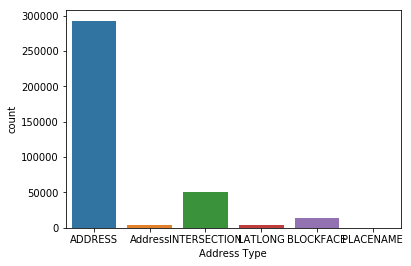

In [28]:
dataset['Address Type'].value_counts()
dataset['Address Type'].fillna(value='Address',inplace=True)
sns.countplot(dataset['Address Type'])

In [29]:
dataset.drop(['Latitude', 'Longitude','Location','Y Coordinate (State Plane)','Landmark'],axis=1,inplace=True)

In [30]:
dataset.isna().sum()

Agency                     0
Agency Name                0
Complaint Type             0
Descriptor              6501
Location Type              0
Incident Zip               0
Address Type               0
City                    2997
Facility Type           2389
Status                     0
Due Date                   3
Borough                    0
Park Facility Name         0
Park Borough               0
Request_Closing_Time    2381
dtype: int64

In [31]:
dataset['City'].value_counts().head()
dataset['Facility Type'].value_counts().head()

BROOKLYN         118862
NEW YORK          77312
BRONX             49171
STATEN ISLAND     15340
JAMAICA            8932
Name: City, dtype: int64

Precinct    362169
Name: Facility Type, dtype: int64

[Text(0,0,'NEW YORK'),
 Text(0,0,'ASTORIA'),
 Text(0,0,'BRONX'),
 Text(0,0,'ELMHURST'),
 Text(0,0,'BROOKLYN'),
 Text(0,0,'KEW GARDENS'),
 Text(0,0,'JACKSON HEIGHTS'),
 Text(0,0,'MIDDLE VILLAGE'),
 Text(0,0,'REGO PARK'),
 Text(0,0,'SAINT ALBANS'),
 Text(0,0,'JAMAICA'),
 Text(0,0,'SOUTH RICHMOND HILL'),
 Text(0,0,'RIDGEWOOD'),
 Text(0,0,'HOWARD BEACH'),
 Text(0,0,'FOREST HILLS'),
 Text(0,0,'STATEN ISLAND'),
 Text(0,0,'OZONE PARK'),
 Text(0,0,'RICHMOND HILL'),
 Text(0,0,'WOODHAVEN'),
 Text(0,0,'FLUSHING'),
 Text(0,0,'CORONA'),
 Text(0,0,'QUEENS VILLAGE'),
 Text(0,0,'OAKLAND GARDENS'),
 Text(0,0,'HOLLIS'),
 Text(0,0,'MASPETH'),
 Text(0,0,'EAST ELMHURST'),
 Text(0,0,'SOUTH OZONE PARK'),
 Text(0,0,'WOODSIDE'),
 Text(0,0,'FRESH MEADOWS'),
 Text(0,0,'LONG ISLAND CITY'),
 Text(0,0,'ROCKAWAY PARK'),
 Text(0,0,'SPRINGFIELD GARDENS'),
 Text(0,0,'COLLEGE POINT'),
 Text(0,0,'BAYSIDE'),
 Text(0,0,'GLEN OAKS'),
 Text(0,0,'FAR ROCKAWAY'),
 Text(0,0,'BELLEROSE'),
 Text(0,0,'LITTLE NECK'),
 Text(0,0,'CAM

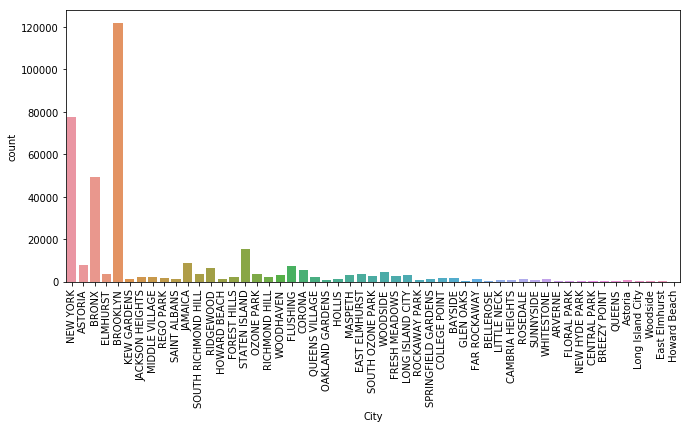

In [27]:
dataset['City'].fillna(value='BROOKLYN',inplace=True)
dataset['City'].value_counts().head()
plt.figure(figsize=(11,5))
plot4=sns.countplot(x=dataset['City'])
plot4.set_xticklabels(plot4.get_xticklabels(),rotation=90)

In [33]:
dataset.isna().sum()

Agency                     0
Agency Name                0
Complaint Type             0
Descriptor              6501
Location Type              0
Incident Zip               0
Address Type               0
City                       0
Facility Type           2389
Status                     0
Due Date                   3
Borough                    0
Park Facility Name         0
Park Borough               0
Request_Closing_Time    2381
dtype: int64

In [35]:
dataset['Request_Closing_Time'].head()

0   00:55:30
1   01:27:13
2   04:51:34
3   07:45:27
4   03:27:44
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [36]:
dataset['Request_Closing_Time'].fillna(value=dataset['Request_Closing_Time'].mean(),inplace=True)

In [37]:
dataset['Request_Closing_Time'].isna().sum()

0

In [38]:
dataset['Request_Closing_Time'].dtypes

dtype('<m8[ns]')

In [39]:
dataset.head(10)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Borough,Park Facility Name,Park Borough,Request_Closing_Time
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,Unspecified,MANHATTAN,00:55:30
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,Unspecified,QUEENS,01:27:13
2,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,Unspecified,BRONX,04:51:34
3,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,Unspecified,BRONX,07:45:27
4,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,Unspecified,QUEENS,03:27:44
5,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:56:30 AM,BROOKLYN,Unspecified,BROOKLYN,01:53:41
6,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:55:32 AM,MANHATTAN,Unspecified,MANHATTAN,01:58:22
7,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:54:05 AM,BRONX,Unspecified,BRONX,01:48:49
8,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,ADDRESS,KEW GARDENS,Precinct,Closed,01/01/2016 07:53:58 AM,QUEENS,Unspecified,QUEENS,08:33:34
9,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:53:58 AM,BROOKLYN,Unspecified,BROOKLYN,01:23:42


In [40]:
dataset['Status'].value_counts()

Closed      362114
Open          1640
Assigned       802
Draft            2
Name: Status, dtype: int64

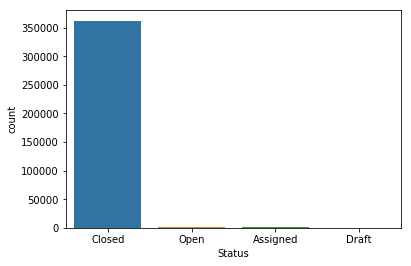

In [41]:
sns.countplot(dataset['Status'])

In [42]:
#bivariate analysis
#the most common complaint
dataset['Complaint Type'].value_counts().head(6)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Name: Complaint Type, dtype: int64

In [43]:
dataset.head(3)

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Borough,Park Facility Name,Park Borough,Request_Closing_Time
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,Unspecified,MANHATTAN,00:55:30
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,Unspecified,QUEENS,01:27:13
2,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,Unspecified,BRONX,04:51:34


In [44]:
desc=dataset.groupby(by='Complaint Type')['Descriptor'].agg('count')
desc

Complaint Type
Agency Issues                     8
Animal Abuse                  10541
Animal in a Park                  1
Bike/Roller/Skate Chronic         0
Blocked Driveway             100881
Derelict Vehicle              21661
Disorderly Youth                315
Drinking                       1409
Ferry Complaint                   2
Graffiti                        157
Homeless Encampment               0
Illegal Fireworks                 0
Illegal Parking               92679
Noise - Commercial            44109
Noise - House of Worship       1070
Noise - Park                   4109
Noise - Street/Sidewalk       51692
Noise - Vehicle               19352
Panhandling                       0
Posting Advertisement           681
Squeegee                          0
Traffic                        5198
Urinating in Public               0
Vending                        4192
Name: Descriptor, dtype: int64

In [45]:
#City with their status
dataset.loc[dataset['City']=='NEW YORK',]['Borough'].value_counts()

MANHATTAN    77308
QUEENS           3
BROOKLYN         1
Name: Borough, dtype: int64

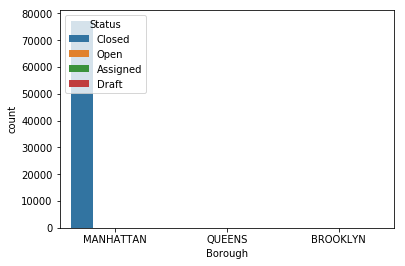

In [29]:
#Newyork city has how many boroughs and whats their status 
sns.countplot(x=dataset.loc[dataset['City']=='NEW YORK',]['Borough'],hue='Status',data=dataset)

In [47]:
#Newyork city has max complaints of which complaint type?
dataset.loc[dataset['City']=='NEW YORK',:]['Complaint Type'].value_counts()

Noise - Street/Sidewalk      22252
Noise - Commercial           18692
Illegal Parking              14553
Noise - Vehicle               6295
Homeless Encampment           3060
Blocked Driveway              2707
Vending                       2639
Animal Abuse                  1941
Traffic                       1770
Noise - Park                  1244
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

[Text(0,0,'Noise - Street/Sidewalk'),
 Text(0,0,'Illegal Parking'),
 Text(0,0,'Noise - House of Worship'),
 Text(0,0,'Noise - Commercial'),
 Text(0,0,'Blocked Driveway'),
 Text(0,0,'Vending'),
 Text(0,0,'Noise - Vehicle'),
 Text(0,0,'Panhandling'),
 Text(0,0,'Animal Abuse'),
 Text(0,0,'Noise - Park'),
 Text(0,0,'Homeless Encampment'),
 Text(0,0,'Traffic'),
 Text(0,0,'Derelict Vehicle'),
 Text(0,0,'Drinking'),
 Text(0,0,'Urinating in Public'),
 Text(0,0,'Bike/Roller/Skate Chronic'),
 Text(0,0,'Graffiti'),
 Text(0,0,'Posting Advertisement'),
 Text(0,0,'Disorderly Youth'),
 Text(0,0,'Illegal Fireworks'),
 Text(0,0,'Squeegee')]

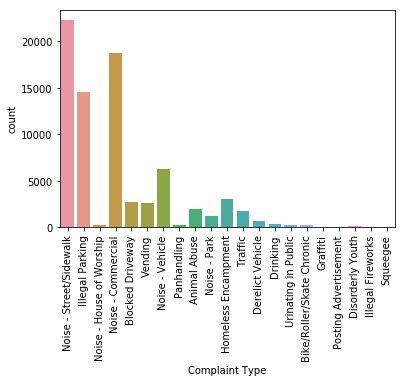

In [48]:
#Countplot to show Newyork city has max complaints of which complaint type?
plot=sns.countplot(x=dataset.loc[dataset['City']=='NEW YORK',:]['Complaint Type'])
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)

In [32]:
#Avg time taken to solve a case in Newyork city
dataset.loc[(dataset['City']=='NEW YORK')&(dataset['Status']=='Closed'),:]['Request_Closing_Time'].mean()

Timedelta('0 days 02:55:17.417518')

In [50]:
dataset.loc[(dataset['City']=='NEW YORK')&(dataset['Status']=='Closed'),:]['Request_Closing_Time'].std()

Timedelta('0 days 04:32:14.424673')

In [51]:
dataset['Borough'].value_counts()

BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Unspecified        2958
Name: Borough, dtype: int64

In [52]:
dataset['Location Type'].value_counts()

Street/Sidewalk               301505
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

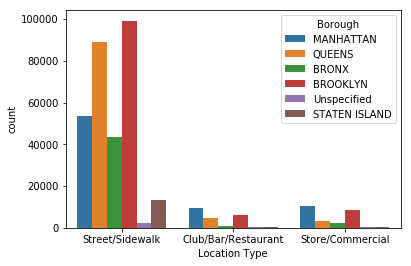

In [53]:
#Top Location type and their countplot with hues='Borough'
sns.countplot(dataset.loc[dataset['Location Type'].isin(['Street/Sidewalk','Store/Commercial','Club/Bar/Restaurant'])]
              ['Location Type'],data=dataset,hue='Borough')


In [54]:
import datetime
dataset['year'] = pd.DatetimeIndex(dataset['Due Date']).year
dataset.head()

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Borough,Park Facility Name,Park Borough,Request_Closing_Time,year
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01/01/2016 07:59:45 AM,MANHATTAN,Unspecified,MANHATTAN,00:55:30,2016.0
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01/01/2016 07:59:44 AM,QUEENS,Unspecified,QUEENS,01:27:13,2016.0
2,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:59:29 AM,BRONX,Unspecified,BRONX,04:51:34,2016.0
3,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01/01/2016 07:57:46 AM,BRONX,Unspecified,BRONX,07:45:27,2016.0
4,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01/01/2016 07:56:58 AM,QUEENS,Unspecified,QUEENS,03:27:44,2016.0


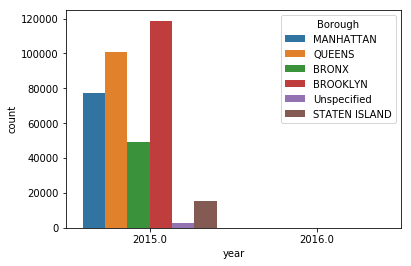

In [55]:
sns.countplot(dataset['year'],hue='Borough',data=dataset)

In [56]:
dataset['Location Type'].value_counts()

Street/Sidewalk               301505
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

In [59]:
#Display the complaint type and city together
dataset[['Complaint Type','City']].head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [60]:
#Find the top 10 complaint types 
dataset['Complaint Type'].value_counts()[0:10,]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

[Text(0,0,'Noise - Street/Sidewalk'),
 Text(0,0,'Blocked Driveway'),
 Text(0,0,'Illegal Parking'),
 Text(0,0,'Derelict Vehicle'),
 Text(0,0,'Noise - Commercial'),
 Text(0,0,'Noise - House of Worship'),
 Text(0,0,'Posting Advertisement'),
 Text(0,0,'Noise - Vehicle'),
 Text(0,0,'Animal Abuse'),
 Text(0,0,'Vending'),
 Text(0,0,'Traffic'),
 Text(0,0,'Drinking'),
 Text(0,0,'Bike/Roller/Skate Chronic'),
 Text(0,0,'Panhandling'),
 Text(0,0,'Noise - Park'),
 Text(0,0,'Homeless Encampment'),
 Text(0,0,'Urinating in Public'),
 Text(0,0,'Graffiti'),
 Text(0,0,'Disorderly Youth'),
 Text(0,0,'Illegal Fireworks'),
 Text(0,0,'Ferry Complaint'),
 Text(0,0,'Agency Issues'),
 Text(0,0,'Squeegee'),
 Text(0,0,'Animal in a Park')]

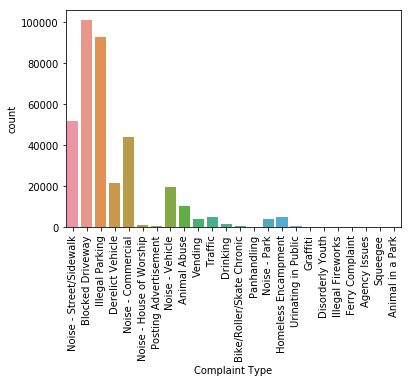

In [61]:
#Plot a bar graph of count vs. complaint types
plot3=sns.countplot(dataset['Complaint Type'])
plot3.set_xticklabels(plot3.get_xticklabels(),rotation =90)

In [35]:
#Display the major complaint types and their count
#top 5 complaint types
series=dataset['Complaint Type'].value_counts()[0:5,]
series
series.nlargest().index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

[Text(0,0,'Noise - Street/Sidewalk'),
 Text(0,0,'Blocked Driveway'),
 Text(0,0,'Illegal Parking'),
 Text(0,0,'Derelict Vehicle'),
 Text(0,0,'Noise - Commercial')]

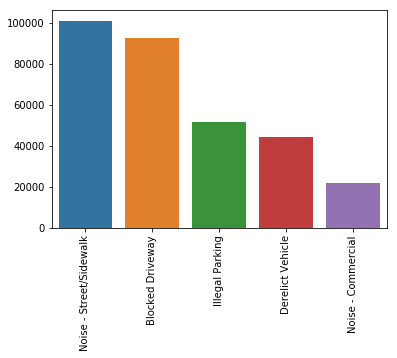

In [63]:
#graph
plot4=sns.barplot(x=series.nlargest().index,y=series.nlargest().values)
plot4.set_xticklabels(plot3.get_xticklabels(),rotation =90)